<a href="https://colab.research.google.com/github/trtrgfh/nQvq9cIZQdwmNjk7/blob/main/notebook/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score
import pickle

# Make Dataset

In [2]:
# %%writefile -a make_dataset.py

url = "https://raw.githubusercontent.com/trtrgfh/nQvq9cIZQdwmNjk7/main/data/ACME-HappinessSurvey2020.csv"
df = pd.read_csv(url)
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
# %%writefile -a make_dataset.py

print(f"df shape: {df.shape}")
X = df.iloc[:, 1:]
y = df[["Y"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

df shape: (126, 7)
X_train shape: (107, 6)
X_test shape: (19, 6)
y_train shape: (107, 1)
y_test shape: (19, 1)


# Train Model

In [4]:
# %%writefile -a train_model.py

model = xgb.XGBClassifier(learning_rate=0.3, gamma=0, reg_lambda=2, random_state=42)
model.fit(X_train, y_train)

# Save trained model
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [5]:
# %%writefile -a predict_model.py

load_model = pickle.load(open("xgboost_model.pkl", "rb"))
pred_y = load_model.predict(X_train)
pred_y_test = load_model.predict(X_test)

In [6]:
# param_grid = {
#     "max_depth": [5, 6, 7],
#     "learning_rate": [0.1, 0.3],
#     "gamma": [0, 0.15],
#     "reg_lambda": [0, 2, 4],
#     "scale_pos_weight": [1, 3],
#     "subsample": [0.8, 1],
#     "colsample_bytree": [0.5, 1],
# }
# grid_cv = GridSearchCV(model, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# grid_cv.fit(X_train, y_train)

In [7]:
# pred_y = grid_cv.predict(X_train)
# pred_y_test = grid_cv.predict(X_test)

In [8]:
# %%writefile -a predict_model.py

# Calculate metrics for training set
print(f"Train_Precision: {precision_score(y_train, pred_y)}")
print(f"Train_Recall: {recall_score(y_train, pred_y)}")
print(f"Train_Accuracy: {accuracy_score(y_train, pred_y)}")
print(f"Train_F1score: {f1_score(y_train, pred_y)}")

# Calculate metrics for testing set
print(f"Test_Precision: {precision_score(y_test, pred_y_test)}")
print(f"Test_Recall: {recall_score(y_test, pred_y_test)}")
print(f"Test_Accuracy: {accuracy_score(y_test, pred_y_test)}")
print(f"Test_F1score: {f1_score(y_test, pred_y_test)}")

Train_Precision: 0.8939393939393939
Train_Recall: 0.9833333333333333
Train_Accuracy: 0.9252336448598131
Train_F1score: 0.9365079365079364
Test_Precision: 0.5833333333333334
Test_Recall: 0.7777777777777778
Test_Accuracy: 0.631578947368421
Test_F1score: 0.6666666666666666


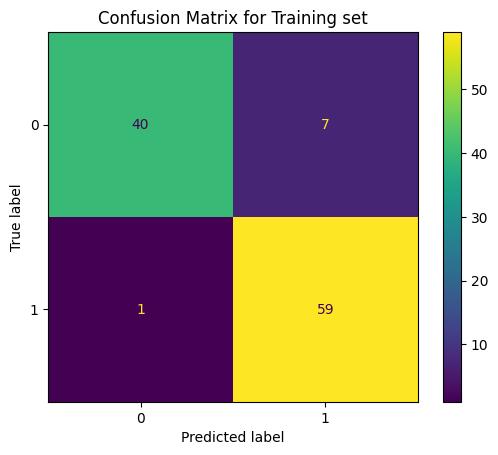

In [9]:
# %%writefile -a visualize.py

# Plot confusion matrix for training
cm = confusion_matrix(y_train, pred_y)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_cm.plot()
plt.title("Confusion Matrix for Training set")
plt.savefig('figure1.png', bbox_inches='tight')
plt.show()

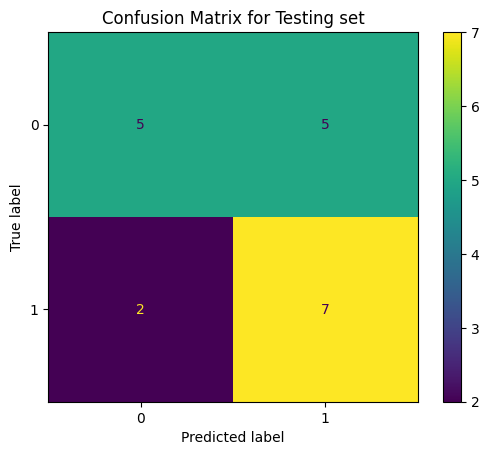

In [10]:
# %%writefile -a visualize.py

# Plot confusion matrix for testing
cm_test = confusion_matrix(y_test, pred_y_test)
disp_cm_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_cm_test.plot()
plt.title("Confusion Matrix for Testing set")
plt.savefig('figure2.png', bbox_inches='tight')
plt.show()

# Feature Selection Approach

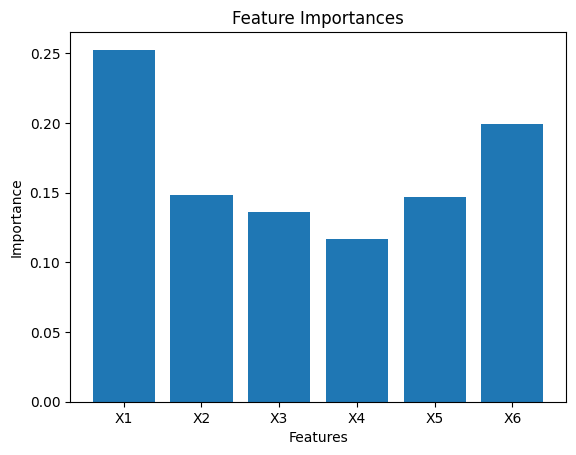

In [11]:
# %%writefile -a visualize.py

im_features = model.feature_importances_
plt.bar(range(len(im_features)), im_features)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(range(len(im_features)), ["X1", "X2", "X3", "X4", "X5", "X6"])
plt.savefig('figure3.png', bbox_inches='tight')
plt.show()

In [12]:
# %%writefile -a make_dataset.py

print("The corrlelation between the features Xi and target Y")
df.corr().iloc[0]

The corrlelation between the features Xi and target Y


Y     1.000000
X1    0.280160
X2   -0.024274
X3    0.150838
X4    0.064415
X5    0.224522
X6    0.167669
Name: Y, dtype: float64

In [13]:
# %%writefile -a make_dataset.py

df2 = df.drop(["X2", "X4"], axis=1)
# df2 = df.drop(["X2", "X3"], axis=1)

In [14]:
# %%writefile -a make_dataset.py

X2 = df2.iloc[:, 1:]
y2 = df2[["Y"]]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.15, random_state=42)
print(f"X_train shape: {X_train2.shape}")
print(f"X_test shape: {X_test2.shape}")
print(f"y_train shape: {y_train2.shape}")
print(f"y_test shape: {y_test2.shape}")

X_train shape: (107, 4)
X_test shape: (19, 4)
y_train shape: (107, 1)
y_test shape: (19, 1)


In [15]:
# %%writefile -a train_model.py

new_model = xgb.XGBClassifier(learning_rate=0.3, gamma=0, reg_lambda=2, random_state=42)
new_model.fit(X_train2, y_train2)

# Save trained new_model
with open('xgboost_new_model.pkl', 'wb') as file:
    pickle.dump(new_model, file)

In [16]:
# %%writefile -a predict_model.py

load_new_model = pickle.load(open("xgboost_new_model.pkl", "rb"))
pred_y2 = load_new_model.predict(X_train2)
pred_y_test2 = load_new_model.predict(X_test2)

In [17]:
# %%writefile -a train_model.py

# Calculate metrics for training set
print("Training")
print(f"Train_Precision: {precision_score(y_train2, pred_y2)}")
print(f"Train_Recall: {recall_score(y_train2, pred_y2)}")
print(f"Train_Accuracy: {accuracy_score(y_train2, pred_y2)}")
print(f"Train_F1score: {f1_score(y_train2, pred_y2)}")

# Calculate metrics for testing set
print("Testing")
print(f"Test_Precision: {precision_score(y_test2, pred_y_test2)}")
print(f"Test_Recall: {recall_score(y_test2, pred_y_test2)}")
print(f"Test_Accuracy: {accuracy_score(y_test2, pred_y_test2)}")
print(f"Test_F1score: {f1_score(y_test2, pred_y_test2)}")

Training
Train_Precision: 0.7887323943661971
Train_Recall: 0.9333333333333333
Train_Accuracy: 0.822429906542056
Train_F1score: 0.8549618320610686
Testing
Test_Precision: 0.7272727272727273
Test_Recall: 0.8888888888888888
Test_Accuracy: 0.7894736842105263
Test_F1score: 0.7999999999999999
